In [2]:
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels
import pandas as pd
import numpy as np
import sys
import io
import math
import re
import seaborn as sns
from scipy.stats import kendalltau
import matplotlib.pyplot as plt
from collections import *
from sklearn.decomposition import PCA
import numpy as np
from sklearn.manifold import TSNE
from mixedmodels import *
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
import math
import scipy

In [34]:
pe_trends = pd.read_csv('pe-trends.3.tsv', sep='\t')
print len(pe_trends)
pe_trends.head(2)

36710


,Year,Id,Citation_Type,Percentage
0,2001,0,Positioning,0.857143
1,2001,0,Essential,0.142857


In [36]:
pe_trends = pe_trends.rename(index=str, columns={"Citation_Type": "Reference Type"})

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


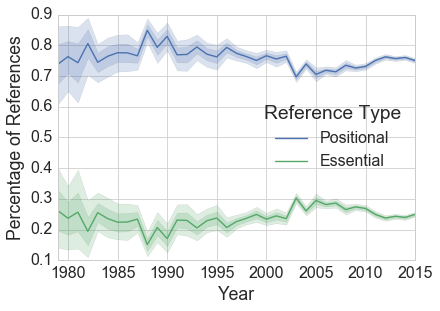

In [31]:
#plt.ylim(0, 1)
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=2)
sns_plot = sns.tsplot(data=pe_trends.sort('Year', ascending=True), time="Year", unit="Id",
           condition="Reference Type", value="Percentage", estimator=scipy.stats.nanmean, ci=[68, 95])
sns_plot.set_ylabel("Percentage of References");

plt.savefig('pe_trends.mean.pdf')

Axes(0.163422,0.179544;0.747692x0.740356)


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:16: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


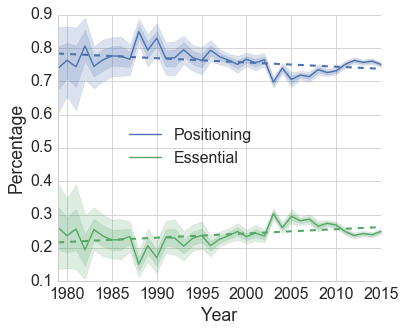

In [37]:
ess = pe_trends[pe_trends['Reference Type'] == 'Essential'][['Year', 'Percentage']]
#print ess
#print ''
#df = pd.DataFrame({'Average' : ess.groupby( [ "Year"] ).mean()}).reset_index()


#ess.head(10)

df = pe_trends.groupby(['Year', 'Reference Type']).mean()
df2 = df.reset_index()
df2.head()
facet_grid = sns.lmplot(x="Year", y="Percentage", data=df2,  hue="Reference Type", scatter=False, ci=None, \
                        legend=False, aspect=1.2, hue_order=['Positioning', 'Essential'], line_kws={'linestyle':"--"});
print facet_grid.axes[0,0]
plt.ylim(0.1, 0.9)

sns_plot = sns.tsplot(data=pe_trends.sort('Year', ascending=True), time="Year", unit="Id", 
           condition="Reference Type", value="Percentage", estimator=scipy.stats.nanmean, ci=[68, 95], ax=facet_grid.axes[0,0])


# Get the handles and labels. For this example it'll be 2 tuples
# of length 4 each.
handles, labels = facet_grid.axes[0,0].get_legend_handles_labels()

# When creating the legend, only use the first two elements
# to effectively remove the last two.
l = plt.legend(handles[2:4], labels[2:4], bbox_to_anchor=(.2, .60), loc=2, borderaxespad=0.)

plt.savefig('pe_trends.mean.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')


In [42]:
tmp = pe_trends[(pe_trends['Year'] >= 1970)]

for ctype in ['Positioning', 'Essential']:
    df = tmp[tmp['Reference Type'] == ctype].groupby(['Year']).mean()
    percs = df['Percentage'].tolist()
    control = [x for x in range(0, len(percs))]
    print ctype, scipy.stats.pearsonr(percs, control)
    
    
tmp = pe_trends[(pe_trends['Year'] >= 1980) & (pe_trends['Year'] <= 2009)]

for ctype in ['Positioning', 'Essential']:
    df = tmp[tmp['Reference Type'] == ctype].groupby(['Year']).mean()
    percs = df['Percentage'].tolist()
    control = [x for x in range(0, len(percs))]
    print ctype, scipy.stats.pearsonr(percs, control)


Positioning (-0.56817029312212808, 0.0010552744385389395)
Essential (0.56817029312213185, 0.0010552744385388365)


In [3]:

cr_trends = pd.read_csv('cite-role-trends.3.tsv', sep='\t')

cr_trends = cr_trends.rename(index=str, columns={"Citation_Type": "Citation Type"})
cr_trends = cr_trends.rename(index=str, columns={"Prior": "Continuation"})
cr_trends = cr_trends.rename(index=str, columns={"CompareOrContrast": "Compare or Contrast"})

cr_trends.head()


,Year,Id,Citation Type,Percentage
0,2015,0,Motivation,0.000000
1,2015,0,Prior,0.000000
2,2015,0,Future,0.000000
3,2015,0,Extends,0.000000
4,2015,0,Background,0.576923


In [4]:
cr_trends.head()
tmp = cr_trends[(cr_trends['Citation Type']=='Uses') | (cr_trends['Citation Type']=='CompareOrContrast') | (cr_trends['Citation Type'] == 'Background')]
#tmp = cr_trends
#print tmp

In [5]:
debug = cr_trends[(cr_trends['Citation Type']=='Background') & (cr_trends['Year']==1980)]
debug.head()
debug.groupby(['Citation Type']).mean()

,Year,Id,Percentage
Citation Type,,,
Background,1980,15,0.278243


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


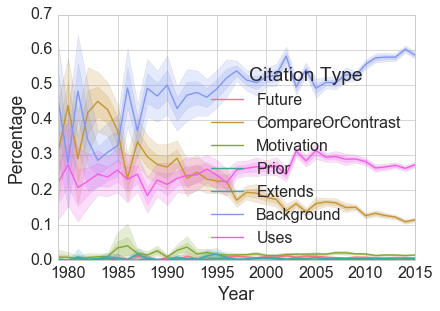

In [25]:
sns_plot = sns.tsplot(data=cr_trends.sort('Year', ascending=True), time="Year", unit="Id",
           condition="Citation Type", value="Percentage", estimator=scipy.stats.nanmean, ci=[68, 95])

Axes(0.163422,0.179544;0.747692x0.740356)


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:11: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


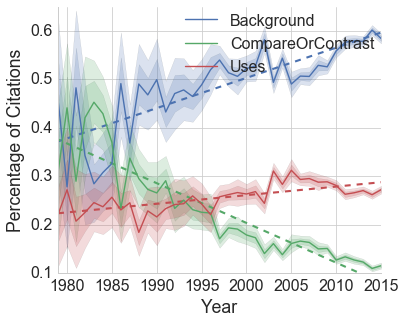

In [28]:
df = tmp[tmp['Year'] >= 1975].groupby(['Year', 'Citation Type']).mean()
df2 = df.reset_index()
df2.head()
facet_grid = sns.lmplot(x="Year", y="Percentage", data=df2,  hue="Citation Type", scatter=False, ci=None, \
                        legend=False, aspect=1.2, order=1, line_kws={'linestyle':"--"});
print facet_grid.axes[0,0]
plt.ylim(0.1, 0.65)


sns.set_style("whitegrid")
sns.set_context("paper", font_scale=2)
sns_plot = sns.tsplot(data=tmp.sort('Year', ascending=True), time="Year", unit="Id",
           condition="Citation Type", value="Percentage", estimator=scipy.stats.nanmean, ci=[68, 95], ax=facet_grid.axes[0,0])
#lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#lgd = plt.legend(bbox_to_anchor=(0.05, 0.05), loc=1, borderaxespad=0., ncol=3)
lgd = plt.legend(ncol=3, prop={'size':13}, columnspacing=0.1)
sns_plot.set_ylabel("Percentage of Citations");



# Get the handles and labels. For this example it'll be 2 tuples
# of length 4 each.
handles, labels = facet_grid.axes[0,0].get_legend_handles_labels()

# When creating the legend, only use the first two elements
# to effectively remove the last two.

# bbox_to_anchor=(.2, .90), 

l = plt.legend(handles[3:6], labels[3:6],  borderaxespad=0.)


plt.savefig('cr_trends.mean.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')


   Year      Citation Type  Id  Percentage
0  1979         Background  13    0.459334
1  1979  CompareOrContrast  13    0.307584
2  1980         Background  15    0.278243
3  1980  CompareOrContrast  15    0.441243
4  1981         Background  13    0.482573
Axes(0.163422,0.179544;0.747692x0.740356)


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:25: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


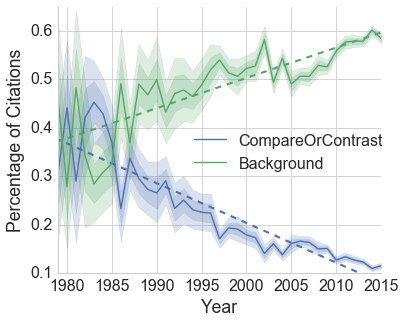

In [22]:
tmp = cr_trends[(cr_trends['Citation Type']=='CompareOrContrast') | (cr_trends['Citation Type'] == 'Background')]

df = tmp[tmp['Year'] >= 1975].groupby(['Year', 'Citation Type']).mean()




df2 = df.reset_index()


#df['Citation Type'] = df['Citation Type'].map({'CompareOrContrast': 'Compares or Contrasts', 'Background': 'Background'})
#df[(df['Citation Type'] != 'CompareOrContrast')] = 'Compare or Contrast'

print df2.head()



facet_grid = sns.lmplot(x="Year", y="Percentage", data=df2,  hue="Citation Type", scatter=False, ci=None, \
                        legend=False, aspect=1.2, order=1, hue_order=['CompareOrContrast', 'Background'], line_kws={'linestyle':"--"});
print facet_grid.axes[0,0]
plt.ylim(0.1, 0.65)


sns.set_style("whitegrid")
sns.set_context("paper", font_scale=2)
sns_plot = sns.tsplot(data=tmp.sort('Year', ascending=True), time="Year", unit="Id",
           condition="Citation Type", value="Percentage", estimator=scipy.stats.nanmean, ci=[68, 95], ax=facet_grid.axes[0,0])
#lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#lgd = plt.legend(bbox_to_anchor=(0.05, 0.05), loc=1, borderaxespad=0., ncol=3)
lgd = plt.legend(ncol=3, prop={'size':13}, columnspacing=0.1)
sns_plot.set_ylabel("Percentage of Citations");



# Get the handles and labels. For this example it'll be 2 tuples
# of length 4 each.
handles, labels = facet_grid.axes[0,0].get_legend_handles_labels()

# When creating the legend, only use the first two elements
# to effectively remove the last two.

# bbox_to_anchor=(.2, .90), 
l = plt.legend(handles[2:4], labels[2:4], bbox_to_anchor=(.4, .55), loc=2, borderaxespad=0.)

#l = plt.legend(handles[2:4], labels[2:4],  borderaxespad=0.)


plt.savefig('cr_trends.subset.mean.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')


In [50]:
tmp = cr_trends[cr_trends['Year'] >= 1970]

for ctype in ['CompareOrContrast', 'Uses', 'Background']:
    df = tmp[tmp['Citation Type'] == ctype].groupby(['Year']).mean()
    percs = df['Percentage'].tolist()
    control = [x for x in range(0, len(percs))]
    print ctype, scipy.stats.pearsonr(percs, control)


CompareOrContrast (-0.89896255658851554, 4.1956083608186783e-14)
Uses (0.67154686514280626, 5.3612615621730784e-06)
Background (0.79636181498738234, 3.7677638192058999e-09)


In [49]:
tmp = cr_trends[cr_trends['Year'] >= 1970]
print tmp
df = tmp[(tmp['Citation Type'] == 'Background') | (tmp['Citation Type'] == 'CompareOrContrast')].groupby(['Year']).mean()
percs = df['Percentage'].tolist()
control = [x for x in range(0, len(percs))]
print ctype, scipy.stats.pearsonr(percs, control)


        Year    Id      Citation Type  Percentage
0       2015     0         Motivation    0.000000
1       2015     0              Prior    0.000000
2       2015     0             Future    0.000000
3       2015     0            Extends    0.000000
4       2015     0         Background    0.576923
5       2015     0               Uses    0.269231
6       2015     0  CompareOrContrast    0.153846
7       2013     0         Motivation    0.000000
8       2013     0              Prior    0.062500
9       2013     0             Future    0.000000
10      2013     0            Extends    0.000000
11      2013     0         Background    0.687500
12      2013     0               Uses    0.187500
13      2013     0  CompareOrContrast    0.062500
14      2014     0         Motivation    0.000000
15      2014     0              Prior    0.240000
16      2014     0             Future    0.000000
17      2014     0            Extends    0.000000
18      2014     0         Background    0.560000


In [104]:
cc_trends = pd.read_csv('year-cc-cites.tsv', sep='\t')

In [110]:
df = cc_trends[['Year', 'Citation Count']].groupby(['Year']).mean()
df2 = df.reset_index()
df2.head()


,Year,Citation Count
0,1979,1.071429
1,1980,1.204301
2,1981,1.280702
3,1982,1.138889
4,1983,1.350467


Axes(0.163422,0.179544;0.747692x0.740356)


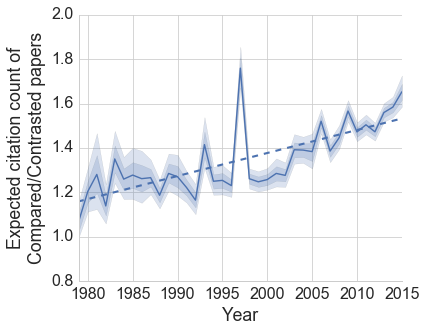

In [114]:
df = cc_trends[['Year', 'Citation Count']].groupby(['Year']).mean()
df2 = df.reset_index()
df2.head()
facet_grid = sns.lmplot(x="Year", y="Citation Count", data=df2,   scatter=False, ci=None, \
                        legend=False, aspect=1.2, order=1, line_kws={'linestyle':"--"});
print facet_grid.axes[0,0]

sns.set_style("whitegrid")

sns.set_context("paper", font_scale=2)
cc_plot = sns.tsplot(data=cc_trends, time="Year", unit="Id",
           value="Citation Count", estimator=scipy.stats.nanmean, ci=[68, 95], ax=facet_grid.axes[0,0])
cc_plot.set_ylabel("Expected citation count of\nCompared/Contrasted papers");

plt.savefig('cc_trends.pdf', bbox_inches='tight')


In [116]:
incite_trends = pd.read_csv('incite-trends.tsv', sep='\t')

In [120]:
incite_trends.head()

,Function,Year,Id,Citation Count
0,Uses,1979,0,1
1,Uses,1979,1,1
2,Uses,1979,2,1
3,Uses,1979,3,1
4,Uses,1979,4,6


In [124]:
df = incite_trends[['Function', 'Year', 'Citation Count']].groupby(['Function', 'Year']).mean()
df2 = df.reset_index()
df2.head()


,Function,Year,Citation Count
0,CompareOrContrast,1979,1.071429
1,CompareOrContrast,1980,1.204301
2,CompareOrContrast,1981,1.280702
3,CompareOrContrast,1982,1.138889
4,CompareOrContrast,1983,1.350467


Axes(0.163422,0.179544;0.747692x0.740356)


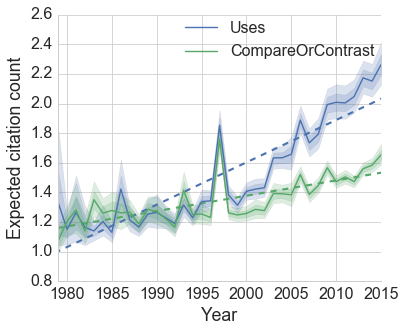

In [135]:
df = incite_trends[['Function', 'Year', 'Citation Count']].groupby(['Function', 'Year']).mean()
df2 = df.reset_index()
df2.head()
facet_grid = sns.lmplot(x="Year", y="Citation Count", data=df2, hue="Function", scatter=False, ci=None, \
                        legend=False, aspect=1.2, order=1, line_kws={'linestyle':"--"}, hue_order=['Uses', 'CompareOrContrast'], );
print facet_grid.axes[0,0]

sns.set_style("whitegrid")

sns.set_context("paper", font_scale=2)
cc_plot = sns.tsplot(data=incite_trends, time="Year", unit="Id", condition="Function",
           value="Citation Count", estimator=scipy.stats.nanmean, ci=[68, 95], ax=facet_grid.axes[0,0])
cc_plot.set_ylabel("Expected citation count");


# Get the handles and labels. For this example it'll be 2 tuples
# of length 4 each.
handles, labels = facet_grid.axes[0,0].get_legend_handles_labels()

# When creating the legend, only use the first two elements
# to effectively remove the last two.

bbox_to_anchor=(.2, .3),
l = plt.legend(handles[2:4], labels[2:4],  borderaxespad=0.)


plt.savefig('cc_trends.pdf', bbox_inches='tight')


In [138]:
tmp = incite_trends[incite_trends['Year'] >= 1970]

for ctype in [ "CompareOrContrast", "Uses",]:
    df = tmp[tmp['Function'] == ctype].groupby(['Year']).mean()
    percs = df['Citation Count'].tolist()
    control = [x for x in range(0, len(percs))]
    print ctype, scipy.stats.pearsonr(percs, control)

CompareOrContrast (0.73421498921042061, 2.3175291953014309e-07)
Uses (0.88921552372904544, 1.941101456308671e-13)
